In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [122]:
df = pd.read_csv("/Users/cansezgin/Python-Output/automobile.csv")

In [124]:
df.describe() # for numerical variables

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [126]:
# for cathegorical variables
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame(name='value_counts')
drive_wheels_counts.index.name = 'drive-wheels'
print(drive_wheels_counts)

              value_counts
drive-wheels              
fwd                    120
rwd                     76
4wd                      9


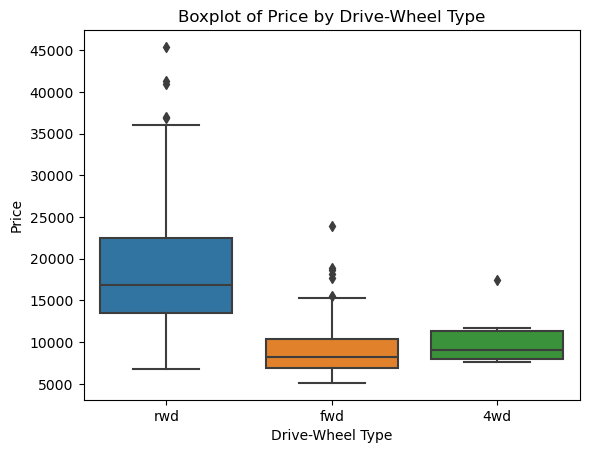

In [128]:
# Step 1: Ensure 'price' is numeric
df["price"] = pd.to_numeric(df["price"], errors='coerce')

# Step 2: Drop rows with missing values in 'price' or 'drive-wheels'
df_box = df[["drive-wheels", "price"]].dropna()

# Step 3: create boxplot
sns.boxplot(x="drive-wheels", y="price", data=df_box)
plt.title("Boxplot of Price by Drive-Wheel Type")
plt.xlabel("Drive-Wheel Type")
plt.ylabel("Price")
plt.show()

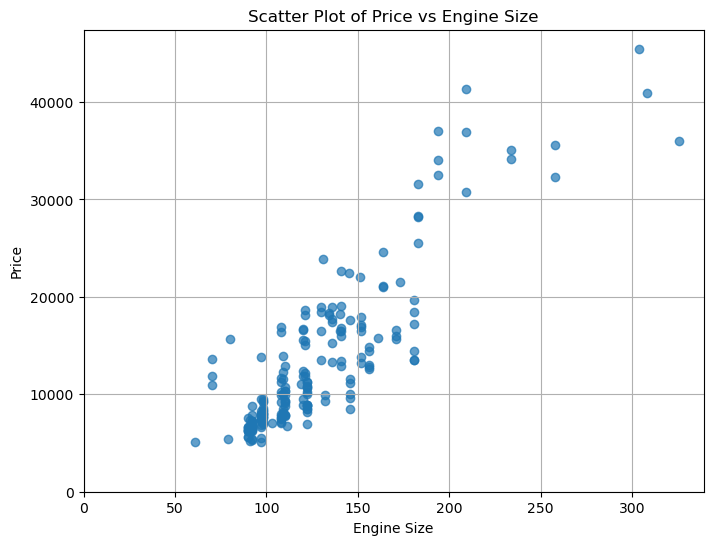

In [130]:
# Ensure 'price' is numeric
df["price"] = pd.to_numeric(df["price"], errors='coerce')

# Drop rows with missing values
df_scatter = df[["engine-size", "price"]].dropna()

# Define x and y
x = df_scatter["engine-size"]
y = df_scatter["price"]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)

# Set axis labels and title
plt.title("Scatter Plot of Price vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# Start axes at 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Optional: add grid
plt.grid(True)

plt.show()

In [132]:
# Groupby
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()

df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [134]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1393/3146758787.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(heatmap)


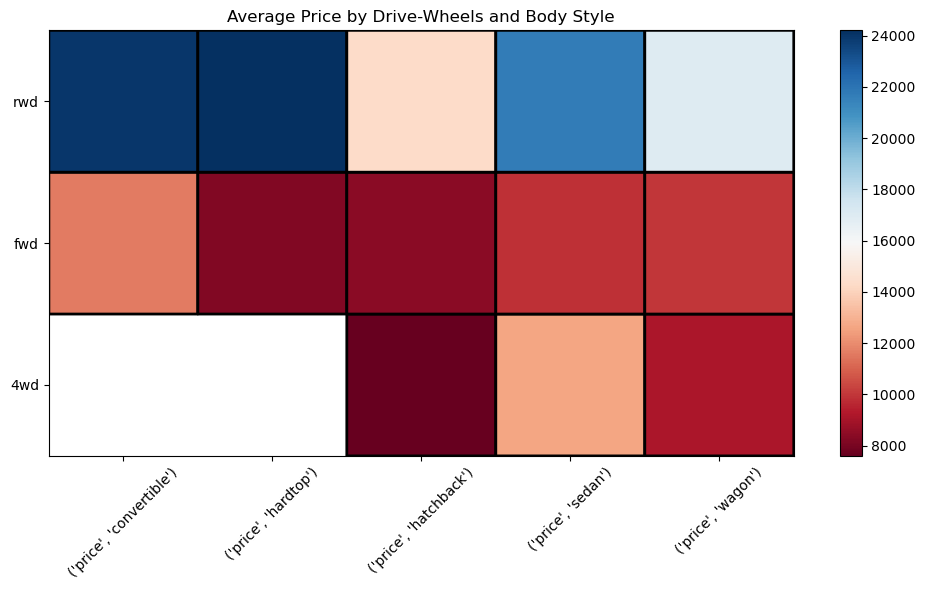

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Create heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolor(df_pivot, cmap='RdBu', edgecolors='k', linewidths=2)

# Step 2: Add color bar
plt.colorbar(heatmap)

# Step 3: Set ticks and labels
plt.xticks(ticks=np.arange(0.5, len(df_pivot.columns), 1), labels=df_pivot.columns, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(df_pivot.index), 1), labels=df_pivot.index)

# Step 4: Title and layout
plt.title("Average Price by Drive-Wheels and Body Style")
plt.tight_layout()
plt.show()

(0.0, 53530.98022593217)

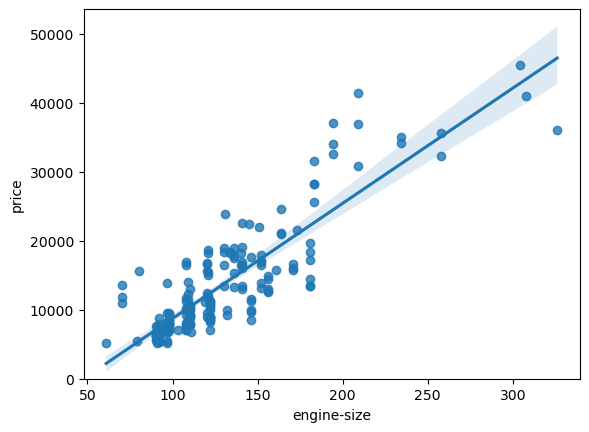

In [138]:
# Strong positive correlation

sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

(0.0, 48159.64514112713)

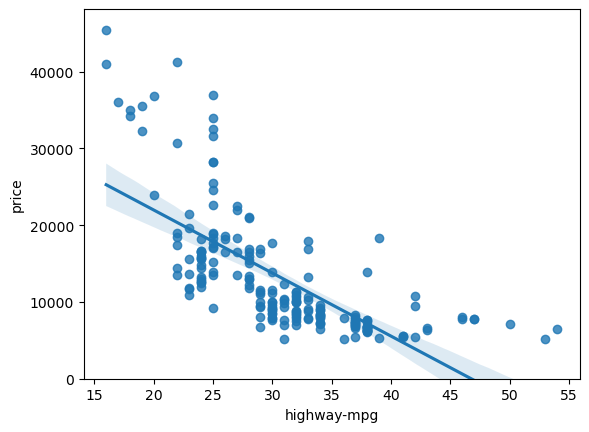

In [140]:
# strong negative correlation

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

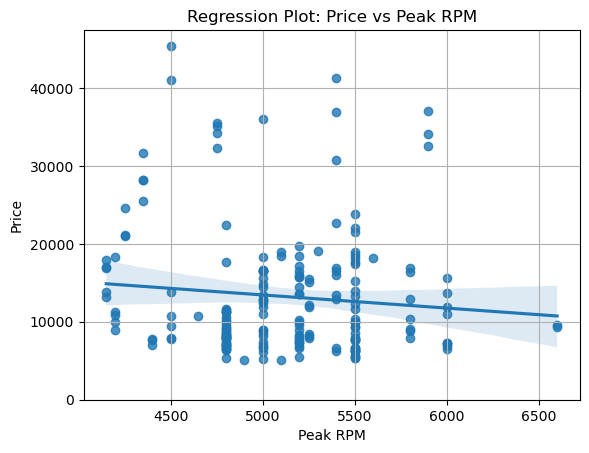

In [142]:
# example of a weak correlation

# Step 1: Ensure columns are numeric
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

# Step 2: Drop rows with missing values in those columns
df_clean = df[["peak-rpm", "price"]].dropna()

# Step 3: Plot regression
sns.regplot(x="peak-rpm", y="price", data=df_clean)
plt.ylim(0,)
plt.title("Regression Plot: Price vs Peak RPM")
plt.xlabel("Peak RPM")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [156]:
# Pearson Correlation
from scipy import stats

df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

df_clean = df[["horsepower", "price"]].dropna()

pearson_coef, p_value = stats.pearsonr(df_clean['horsepower'], df_clean['price'])
print("Pearson Correlation Coefficient:", pearson_coef)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.8105330821322062
P-value: 1.1891278276945977e-47


In [158]:
# Calculate the correlation between variables of type int64 or float64

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.150276,-0.013331,-0.203775,0.015940,0.011255,-0.117889
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
wheel-base,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
compression-ratio,0.150276,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,-0.013331,0.071622,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533


<Axes: xlabel='body-style', ylabel='price'>

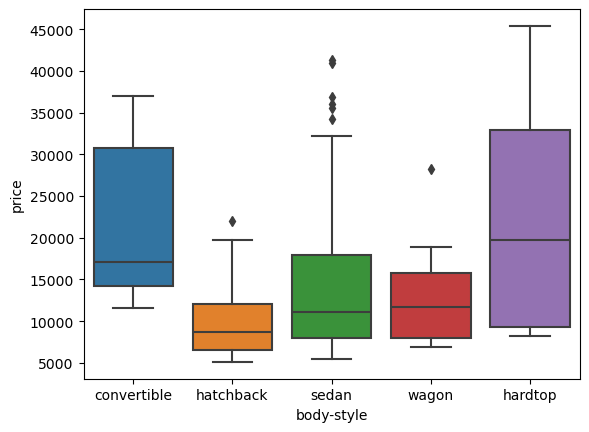

In [166]:
sns.boxplot(x="body-style", y="price", data=df)